In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv('ex1data2.txt')
data.head()

,x1,x2,y
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [5]:
Xd = data.drop(columns=['y'])
Xd.insert(0, 'x0', 1)
Xd.head()

,x0,x1,x2
0,1,2104,3
1,1,1600,3
2,1,2400,3
3,1,1416,2
4,1,3000,4


In [7]:
Xd.iloc[0,:]

x0       1
x1    2104
x2       3
Name: 0, dtype: int64

In [8]:
# Numpy array format
y = data.y.values
X = Xd.values

In [14]:
# sample size
m = len(data.index)
m

47

In [15]:
# number of features
n = X.shape[1]
n

3

In [16]:
theta = np.ones(n)
theta

array([1., 1., 1.])

In [18]:
%%time
hypo = X @ theta

Wall time: 0 ns


In [19]:
hypo

array([2108., 1604., 2404., 1419., 3005., 1990., 1538., 1431., 1384.,
       1498., 1945., 2004., 1894., 4484., 1272., 2305., 1323., 1240.,
       2614., 3036., 1771., 1891., 1608., 1967., 3894., 1104., 1462.,
       2530., 2204., 2641., 1842., 1002., 2045., 3141., 1816., 1441.,
       1243., 2137., 4220., 2167., 1667., 2242., 2572., 1204.,  855.,
       1857., 1207.])

In [20]:
%%time
# cost function
cost = (1/(2*m))*np.transpose((X@theta - y))@(X@theta - y)

Wall time: 0 ns


In [21]:
cost

64828197300.79787

In [22]:
def cost(theta, X=X, y=y, m=m):
    cost = np.transpose((X@theta - y))@(X@theta - y)
    cost = (1/(2*m))*cost
    return cost

In [23]:
cost(theta)

64828197300.797874

In [24]:
%%time
dev = (1/m)*np.transpose(X)@(X@theta - y)

Wall time: 0 ns


In [25]:
dev

array([-3.38407809e+05, -7.59579615e+08, -1.11367989e+06])

In [26]:
def cost_dev(thetar=theta, X=X, y=y, m=m):
    dev = np.transpose(X) @ (X@thetar - y)
    dev = (1/m)*dev
    return np.array(dev)

In [27]:
cost_dev()

array([-3.38407809e+05, -7.59579615e+08, -1.11367989e+06])

In [28]:
(X@theta-y).shape

(47,)

In [29]:
X.shape

(47, 3)

In [30]:
# Learning rate
a = 0.01

In [31]:
theta = np.ones(n)
theta

array([1., 1., 1.])

In [32]:
%%time
cost_list = []
for i in range(1000):
    theta = theta - a*(1/m)*np.transpose(X)@(X@theta - y)
    cost_val = cost(theta)
    cost_list.append(cost_val)

Wall time: 46.9 ms


Text(0.5, 1.0, 'Vectorization: MSE Trend over Iterations')

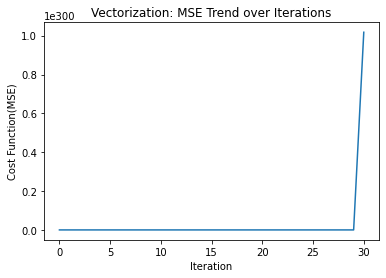

In [33]:
plt.plot(np.arange(0, 1000), cost_list)
plt.xlabel('Iteration'); plt.ylabel('Cost Function(MSE)'); plt.title('Vectorization: MSE Trend over Iterations')

In [34]:
cost_val

nan